# IEEE floating points

* A single precision floating point number is defiend by 32 bits.
* Each bit takes the value of either 0 or 1 (base 2 system)

* The first bit is for the sign of the number, and uses the convention $$ (-1)^S, $$ 
        * so S=0 if the number is positive

* The next 8 bits gives the magnitude of the number, in base 2. This quatity is represented by here by $e$:
$$ e = b_7 2^7 + b_6 2^6 +\cdots+ b_0 2^0$$ 

* The remaining 23 bits stores the actual "digits" of the number.

$$ A = (-1)^S*\frac{e}{2^127}*1.m = (-1)^S \times 2^{e-127} \times (1.m)_{\mathrm{base} 2} $$

* Base 2 representation: $$(1.m)_{\mathrm{base} 2} = 1+ b_1~2^{-1} + b_2~2^{-2}+\cdots+b_{23}~2^{-23}$$



In [6]:
printbits(Float32(2.5))

0 10000000 01000000000000000000000

In [2]:
printred(x)  =print("\x1b[31m"*x*"\x1b[0m ")
printgreen(x)=print("\x1b[32m"*x*"\x1b[0m ")
printblue(x) =print("\x1b[34m"*x*"\x1b[0m\n")

#for ANSI codes for defining color in a terminal: check out the blog: 
# http://jafrog.com/2013/11/23/colors-in-terminal.html


function printbits(x::Float32)
   bts=bits(x)
    printred(bts[1:1])
    printgreen(bts[2:2+8-1])
    printblue(bts[2+8:end])
end

function printbits(x::Float64)
#to be filled in as a homework assignment
end

printbits (generic function with 2 methods)

In [12]:
println("Sub-normal numbers: ")
print("-0.0: ")
bits(-0.0)

Sub-normal numbers: 
-0.0: 

"1000000000000000000000000000000000000000000000000000000000000000"

In [13]:
println("Exceptions: ")
print(" NaN = ")
printbits(Float32(NaN))
println()

print(" Inf = ")
printbits(Float32(Inf))
println()

print("-Inf = ")
printbits(Float32(-Inf))

Exceptions: 
 NaN = 0 11111111 10000000000000000000000

 Inf = 0 11111111 00000000000000000000000

-Inf = 1 11111111 00000000000000000000000


# Home work assignments:

1. Write a Julia function that prints the bits of a double precision floating point.

2. Write an algorithm, in psuedo-code, that converts a given real number into the closest IEEE floating number. You may assume that all the mathematical Explain your algorithm.

3. Let $x$ be a floating number in $[1,2]$. Can $x*(1/x)$ be different from $1$ on a computer? find an upper bound on $|1-fl(x*fl(1/x))|$. Explain your answer.

## Cancellation errors

In [9]:
a=Float32(1/3)
b=Float32(1/3)+Float32(2.0^(-25)*(π/4))

printbits(a)
println()
printbits(b)
println()

c=(a-b)*2^20
printbits(c)

println(c)

0 01111101 01010101010101010101011

0 01111101 01010101010101010101100

1 01111010 00000000000000000000000
-0.03125


In [10]:
a=Float64(1/3)
b=Float64(1/3)+Float64(2.0^(-25)*(π/4))

printbits(a)
println()
printbits(b)
println()

println()
c=(a-b)*2^20

println(c)

0 01111111101 0101010101010101010101010101010101010101010101010101

0 01111111101 0101010101010101010101101110011101110101000010101001


-0.024543692590668797


In [25]:
a=Float64(Float32(1/3))
bb=a+Float64(2.0^(-28)*(π/4))

b-bb

-9.934107481068821e-9

## Problem of evaluating the quadratic formula

$$ ax^2+bx+x = 0 \implies x=\pm \frac{-b\pm\sqrt{b^2-4ac}}{2a} $$

* Cancellation errors occurs when $b^2$ is much bigger than $4ac$. 
* If so, the root $$ \sqrt{b^2-4ac} \approx |b| $$ and the root $$x= (-b-(|b|+\delta))/2a $$ will lose accuracy

In [1]:
a=1.0
c=1e-12
b=2.0

bad_formula=-b+sqrt(b^2-4.0*a*c)

-1.000088900582341e-12

In [2]:
#remedy formula:

good_formula=4.0*a*c/(-b-sqrt(b^2-4.0*a*c))

-1.00000000000025e-12

### Use of BigFloat

We apply the standard quadratic formula with floating points with many more digits.
The outcome should be close to the one evaluated by the modified formula.

In [3]:
A=BigFloat(1.0)
C=BigFloat(1e-12)
B=BigFloat(2.0)

BB=-B+sqrt(B^2-4.0*A*C)

println("The computed number using the bad formula and BigFloat: \n", BB)
println("\nis identical to the value computed by teh good formula: \n", good_formula)

The computed number using the bad formula and BigFloat: 
-1.000000000000249979886647754245558691145588771407201475735952561810612921414033e-12

is identical to the value computed by teh good formula: 
-1.00000000000025e-12


## Example: comptuation of $\pi$

In [5]:
function compute_pi_unstable()
    s=sqrt(3)/2;  A=3*s; n=6; #initialization 
    z=[A-pi n A s];
    while s>1e-10
        s=sqrt((1-sqrt(1-s*s))/2);
        n=2*n; A=n/2*s;
        z=[z; A-pi n A s]; #this is not an efficient way to compute.
    end
    zrow, zcol=size(z);
    for i=1:zrow
        @printf("%10d %20.15f %20.15f %20.15f\n", z[i,2], z[i,3], z[i,1], z[i,4])
    end
end

function compute_pi_unstable_big()
    s=BigFloat(sqrt(3)/2);  A=BigFloat(3*s); n=6; #initialization 
    z=[A-pi n A s];
    while s>1e-10
        s=sqrt((1-sqrt(1.0-s*s))/2);
        n=2*n; A=n/2*s;
        z=[z; A-pi n A s]; #this is not an efficient way to compute.
    end
    zrow, zcol=size(z);
    for i=1:zrow
        @printf("%10d %20.15f %20.15f %20.15f\n", z[i,2], z[i,3], z[i,1], z[i,4])
    end
end

compute_pi_unstable_big (generic function with 1 method)

In [6]:
compute_pi_unstable_big()

         6    2.598076211353316   -0.543516442236477    0.866025403784439
        12    3.000000000000000   -0.141592653589793    0.500000000000000
        24    3.105828541230249   -0.035764112359544    0.258819045102521
        48    3.132628613281238   -0.008964040308555    0.130526192220052
        96    3.139350203046867   -0.002242450542926    0.065403129230143
       192    3.141031950890509   -0.000560702699284    0.032719082821776
       384    3.141452472285462   -0.000140181304331    0.016361731626487
       768    3.141557607911857   -0.000035045677936    0.008181139603937
      1536    3.141583892148318   -0.000008761441475    0.004090604026235
      3072    3.141590463228050   -0.000002190361743    0.002045306291164
      6144    3.141592105999271   -0.000000547590522    0.001022653680338
     12288    3.141592516692157   -0.000000136897636    0.000511326907014
     24576    3.141592619365384   -0.000000034224410    0.000255663461862
     49152    3.141592645033691   -0.0

In [7]:
function compute_pi_stable()
    oldA=0.0; s=sqrt(3)/2; newA=3*s; n=6; #initialization
    z=[newA n newA s];
    while newA>oldA
        oldA=newA;
        s=s/sqrt(2*(1+sqrt((1+s)*(1-s))));
        n=2*n; newA=n/2*s;
        z=[z; newA-pi n newA s];
    end
    zrow, zcol=size(z);
    for i=1:zrow
        @printf("%10d %20.15f %20.15f %20.15f\n", z[i,2], z[i,3], z[i,1], z[i,4])
    end
end

compute_pi_stable (generic function with 1 method)

In [8]:
compute_pi_stable()

         6    2.598076211353316    2.598076211353316    0.866025403784439
        12    3.000000000000000   -0.141592653589793    0.500000000000000
        24    3.105828541230249   -0.035764112359544    0.258819045102521
        48    3.132628613281238   -0.008964040308555    0.130526192220052
        96    3.139350203046867   -0.002242450542926    0.065403129230143
       192    3.141031950890509   -0.000560702699284    0.032719082821776
       384    3.141452472285462   -0.000140181304332    0.016361731626487
       768    3.141557607911857   -0.000035045677936    0.008181139603937
      1536    3.141583892148318   -0.000008761441475    0.004090604026235
      3072    3.141590463228050   -0.000002190361744    0.002045306291164
      6144    3.141592105999271   -0.000000547590522    0.001022653680338
     12288    3.141592516692156   -0.000000136897637    0.000511326907014
     24576    3.141592619365383   -0.000000034224410    0.000255663461862
     49152    3.141592645033690   -0.0

## Example: numerical differentiation

  likely near In[5]:9
Stacktrace:
 [1] depwarn at ./deprecated.jl:70 [inlined]
 [2] is_linux() at ./deprecated.jl:31
 [3] find_backend(::PyCall.PyObject) at /opt/julia_packages/.julia/v0.7/PyPlot/src/init.jl:52
 [4] __init__() at /opt/julia_packages/.julia/v0.7/PyPlot/src/init.jl:179
 [5] _include_from_serialized(::String) at ./loading.jl:149
 [6] _require_from_serialized(::Symbol, ::String) at ./loading.jl:155
 [7] _require_search_from_serialized(::Symbol, ::String) at ./loading.jl:175
 [8] _require(::Symbol) at ./loading.jl:365
 [9] require(::Symbol) at ./loading.jl:318
 [10] include_string(::Module, ::String, ::String) at ./loading.jl:431
 [11] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.7/IJulia/src/execute_request.jl:154
 [12] (::Base.#inner#4{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at ./essentials.jl:421
 [13] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.7/IJulia/src/eventloop.jl:8
 [14] (::IJulia.##14#17)

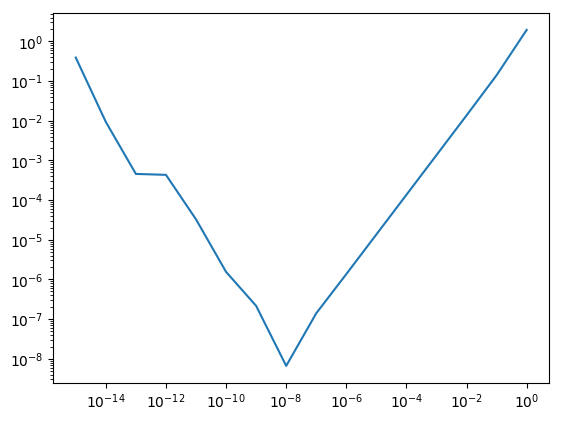

Stacktrace:
 [1] depwarn at ./deprecated.jl:70 [inlined]
 [2] readstring(::IOStream) at ./deprecated.jl:57
 [3] npyinitialize() at /opt/julia_packages/.julia/v0.7/PyCall/src/numpy.jl:77
 [4] NpyArray(::Array{Float64,1}, ::Bool) at /opt/julia_packages/.julia/v0.7/PyCall/src/numpy.jl:189
 [5] PyCall.PyObject(::Array{Float64,1}) at /opt/julia_packages/.julia/v0.7/PyCall/src/numpy.jl:204
 [6] map(::Type{T} where T, ::Tuple{Array{Float64,1},Array{Float64,1}}) at ./tuple.jl:139
 [7] #_pycall#67(::Array{Any,1}, ::Function, ::PyCall.PyObject, ::Array{Float64,1}, ::Vararg{Array{Float64,1},N} where N) at /opt/julia_packages/.julia/v0.7/PyCall/src/PyCall.jl:641
 [8] _pycall(::PyCall.PyObject, ::Array{Float64,1}, ::Vararg{Array{Float64,1},N} where N) at /opt/julia_packages/.julia/v0.7/PyCall/src/PyCall.jl:641
 [9] #pycall#71(::Array{Any,1}, ::Function, ::PyCall.PyObject, ::Type{PyCall.PyAny}, ::Array{Float64,1}, ::Vararg{Array{Float64,1},N} where N) at /opt/julia_packages/.julia/v0.7/PyCall/src/Py

In [5]:
x0=1.0;
a=-15:1:0
h=10.0.^a;
f(x)=exp.(x);

df=(f(x0+h)-f(x0))./h;
error=abs.(df-exp(x0));

using PyPlot
plot(h,error)
xscale("log")
yscale("log")